In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/Users/antoniojaenarias/Desktop/DATA SCIENCE/TODO/ML_KAGGLE_1/data/data.csv")
df

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
...,...,...,...,...,...,...,...,...,...,...
31639,31639,Thompson,NaN,NaN,1736.0,0.0886,NaN,7.8,591.0,2.3
31640,31640,NaN,NaN,13.79,NaN,NaN,4.7,4.7,NaN,3.9
31641,31641,Thompson,NaN,18.27,658.0,-0.1224,3.0,3.0,150.0,2.3
31642,31642,Thompson,tube,6.89,3825.0,NaN,23.6,23.6,1972.0,3.7


In [4]:
train=df[df['x_e_out [-]'].isnull()!=True]
train.reset_index(inplace=True,drop=True)

test=df[df['x_e_out [-]'].isnull()==True]
test.reset_index(inplace=True,drop=True)
test

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
1,7,Peskov,tube,18.00,750.0,NaN,10.0,10.0,1650.0,2.2
2,10,Thompson,tube,NaN,NaN,NaN,1.9,1.9,152.0,3.2
3,12,Thompson,NaN,6.89,7500.0,NaN,NaN,12.8,1930.0,4.8
4,23,Beus,annulus,15.51,1355.0,NaN,5.6,15.2,2134.0,2.1
...,...,...,...,...,...,...,...,...,...,...
10410,31633,Thompson,tube,11.03,NaN,NaN,11.5,11.5,NaN,2.0
10411,31634,Richenderfer,plate,1.01,2000.0,NaN,15.0,120.0,10.0,6.2
10412,31637,Weatherhead,tube,13.79,688.0,NaN,NaN,11.1,457.0,2.3
10413,31640,NaN,NaN,13.79,NaN,NaN,4.7,4.7,NaN,3.9


In [6]:
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
num_cols.remove('id')

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

all_features=num_cols + cat_cols
all_features

['pressure [MPa]',
 'mass_flux [kg/m2-s]',
 'x_e_out [-]',
 'D_e [mm]',
 'D_h [mm]',
 'length [mm]',
 'chf_exp [MW/m2]',
 'author',
 'geometry']

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import re

def preprocess_data(train, cat_cols, num_cols):
    # Copy the original dataframe to avoid modifying the original data
    processed_df = train.copy()
    
    # Handling missing values in numerical variables
    num_imputer = SimpleImputer(strategy='mean')
    processed_df[num_cols] = num_imputer.fit_transform(processed_df[num_cols])
    
    # Handling missing values in categorical variables
    cat_imputer = SimpleImputer(strategy='most_frequent')
    processed_df[cat_cols] = cat_imputer.fit_transform(processed_df[cat_cols])
    
    # Label encoding for categorical variables
    label_encoder = LabelEncoder()
    for col in cat_cols:
        processed_df[col] = label_encoder.fit_transform(processed_df[col].astype(str))
    
    # Preprocess column names
    processed_df.columns = [re.sub(r'[\[\]<>\s]+', '_', col) for col in processed_df.columns]
    
    return processed_df

In [9]:
processed_df=preprocess_data(train, cat_cols, num_cols)
processed_df

,id,author,geometry,pressure_MPa_,mass_flux_kg/m2-s_,x_e_out_-_,D_e_mm_,D_h_mm_,length_mm_,chf_exp_MW/m2_
0,0,7,2,7.000000,3770.000000,0.1754,8.589305,10.8,432.0,3.6
1,1,7,2,10.635066,6049.000000,-0.0416,10.300000,10.3,762.0,6.2
2,2,7,2,13.790000,2034.000000,0.0335,7.700000,7.7,457.0,2.5
3,3,0,0,13.790000,3679.000000,-0.0279,5.600000,15.2,2134.0,3.0
4,5,7,2,17.240000,3648.000000,-0.0711,8.589305,1.9,696.0,3.6
...,...,...,...,...,...,...,...,...,...,...
21224,31636,7,2,12.070000,3070.487779,-0.0195,8.589305,1.9,152.0,5.4
21225,31638,7,2,10.635066,3648.000000,-0.0487,4.700000,4.7,318.0,9.0
21226,31639,7,2,10.635066,1736.000000,0.0886,8.589305,7.8,591.0,2.3
21227,31641,7,2,18.270000,658.000000,-0.1224,3.000000,3.0,150.0,2.3


In [11]:
X=processed_df.drop('x_e_out_-_', axis=1)
y=processed_df["x_e_out_-_"]

print(X.shape)
print(y.shape)

(21229, 9)
(21229,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1,
                                                    shuffle=True)

print("TRAIN SIZE:", X_train.shape)
print("TEST SIZE:", X_test.shape)

print("TRAIN TARGET SIZE:", y_train.shape)
print("TEST TARGET SIZE:", y_test.shape)

TRAIN SIZE: (16983, 9)
TEST SIZE: (4246, 9)
TRAIN TARGET SIZE: (16983,)
TEST TARGET SIZE: (4246,)


In [15]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train, y_train)

model.coef_

array([ 2.43192434e-09,  1.48078885e-03, -5.83687927e-03, -7.74015125e-03,
       -6.46883422e-06, -3.55749729e-04, -4.93409381e-04,  3.18450784e-05,
       -1.82826057e-02])

In [17]:
y_hat=model.predict(X_test)
y_hat

array([-0.00645932,  0.13347513,  0.01238876, ...,  0.02002732,
       -0.03171877, -0.01536786])

(array([   3.,    0.,    0.,    4.,   25.,   74.,  498., 2451., 1111.,
          80.]),
 array([-0.90348579, -0.78487265, -0.66625951, -0.54764638, -0.42903324,
        -0.3104201 , -0.19180697, -0.07319383,  0.04541931,  0.16403244,
         0.28264558]),
 <BarContainer object of 10 artists>)

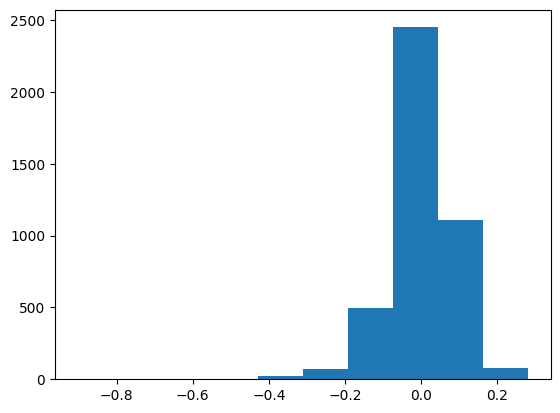

In [18]:
import matplotlib.pyplot as plt

res=y_test-y_hat

plt.hist(res)


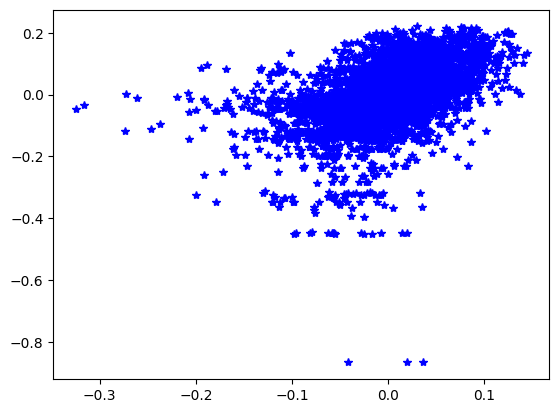

In [20]:
plt.plot(y_hat, y_test, "b*")

In [29]:
from sklearn.metrics import mean_squared_error

rmse=mean_squared_error(y_test, y_hat)

print(f"RMSE in LinearRegression:  {rmse} ")

RMSE in LinearRegression:  0.007827770998518203 


# Regularization:
- Ridge
- Lasso
- ElasticNet

## Ridge

In [28]:
# Example Scaling - It's a part of Ridge

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

print("Train data shape of X = % s and Y = % s : "%( 
    X_train.shape, y_train.shape)) 
  
print("Test data shape of X = % s and Y = % s : "%( 
    X_test.shape, y_test.shape)) 

Train data shape of X = (16983, 9) and Y = (16983,) : 
Test data shape of X = (4246, 9) and Y = (4246,) : 


In [33]:
lreg=LinearRegression()
lreg.fit(X_train_sc, y_train)
lreg_pred=lreg.predict(X_test_sc)

rmse_sc=mean_squared_error(y_test, lreg_pred)
print("RMSE with SC:", rmse_sc)

RMSE with SC: 0.00782429820616918


In [49]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=100000)  # If alpha > 1000000, RMSE increase
ridge.fit(X_train, y_train)
ridge_pred=ridge.predict(X_test)

rmse_ridge=mean_squared_error(y_test, ridge_pred)
print(f"RMSE in LR with Ridge: {rmse_ridge}")


RMSE in LR with Ridge: 0.008222314962120975


## Lasso

In [53]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=100) # If alpha > 100, RMSE increase
lasso.fit(X_train, y_train)
lasso_pred=lasso.predict(X_test)

rmse_lasso=mean_squared_error(y_test, lasso_pred)
print(f"RMSE in LR with Lasso: {rmse_lasso}")


RMSE in LR with Lasso: 0.01019298653806212


## ElasticNet

In [54]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(X_train, y_train)
en_pred=en.predict(X_test)

rmse_en=mean_squared_error(y_test, en_pred)
print(f"RMSE in LR with ElasticNet: {rmse_en}")

RMSE in LR with ElasticNet: 0.00906539628084612


In [55]:
from sklearn.model_selection import KFold

ls_rmse_errors = []
ls_std_errors = []
alphas = np.logspace(-1, 2, 50)
for alpha in alphas:
    kf = KFold(n_splits=5, shuffle=True, random_state=421)
    ls_error = []
    for idx_train, idx_test in kf.split(X_train):
        X_train_cv = X_train.iloc[idx_train]#.copy()
        y_train_cv = y_train.iloc[idx_train]
        X_test_cv = X_train.iloc[idx_test]#.copy()
        y_test_cv = y_train.iloc[idx_test]

        sc = StandardScaler()
        X_train_cv_sc = sc.fit_transform(X_train_cv)
        X_test_cv_sc = sc.transform(X_test_cv)

        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train_cv_sc, y_train_cv)

        y_pred_cv = ridge.predict(X_test_cv_sc)

        rmse = mean_squared_error(y_test_cv, y_pred_cv)
        ls_error.append(rmse)
    
    ls_rmse_errors.append(np.mean(ls_error))
    ls_std_errors.append(np.std(ls_error))

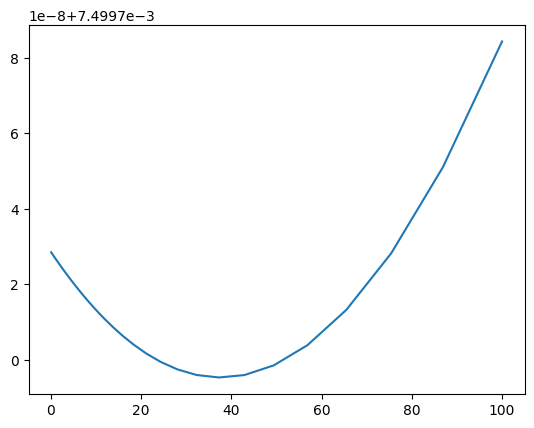

In [56]:
plt.plot(alphas, ls_rmse_errors)